# Math lectures viewers flattening the curve

In [228]:
import re
import requests
import numpy as np
import matplotlib.pyplot as plt

### Function to collect the individual video urls

In [222]:
def get_playlist_links(url, skip_vids = []):
    source = requests.get(url).text.split('\n')
    domain = 'https://www.youtube.com'
    tag_re = re.compile('href=.*playlist-video')
    ref_re = re.compile('href.*;')
    links = [x for x in source if tag_re.search(x)]
    return [
        domain + 
        ref_re.findall(x)[0].strip("href=\"").split(";")[0] 
        for i,x in enumerate(links)
        if not (i+1) in skip_vids
    ]

### Function to get view count for individual lecture

In [285]:
def get_view_count(url, max_attempt = 5):
    attempt = 0
    found = False
    while attempt < max_attempt and not found:
        source = requests.get(url).text.split('\n')
        for line in source:
            if 'views-info' in line:
                found = True
                break
        attempt += 1
    if not found:
        raise ValueError('Didn\'t find view-count for video ' + url)
    r = re.compile('[0-9.]{2,}')
    views = r.findall(line)[0]
    return int(''.join(views.split('.')))

### URLs for some lecture series

In [278]:
urls = {
    'MIT: Single Variable Calculus': "https://www.youtube.com/watch?v=7K1sB05pE0A&amp=&list=PL590CCC2BC5AF3BC1&amp=",
    'MIT: Linear Algebra': 'https://www.youtube.com/watch?v=QVKj3LADCnA&list=PL49CF3715CB9EF31D',
    'Richard McElreath: Statistical Rethinking': 'https://www.youtube.com/watch?v=4WVelCswXo4&list=PLDcUM9US4XdNM4Edgs7weiyIguLSToZRI'
}

### Get the view counts

In [280]:
views = {
    lecture: np.array([
        get_view_count(u) 
        for u in get_playlist_links(playlist)
    ])
    for lecture, playlist in urls.items()
}

### Plot unnormalized results

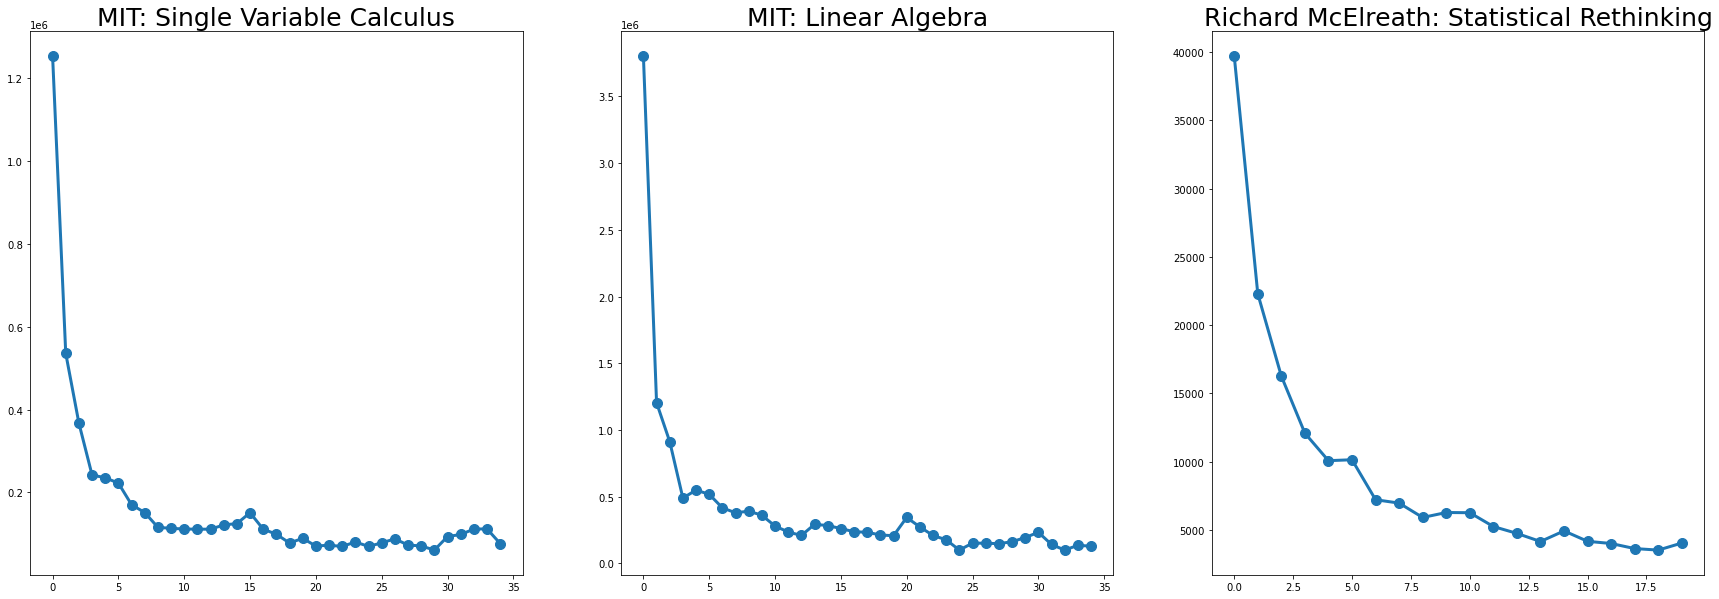

In [295]:
_, axs = plt.subplots(figsize=(30,10), nrows = 1, ncols = 3)
for i, (lecture, counts) in enumerate(views.items()):
    axs[i].plot(
        counts, 
        'o-', 
        linewidth = 3, 
        markersize = 10
    )
    axs[i].set_title(lecture, size=25)

### Normalize and plot comparison

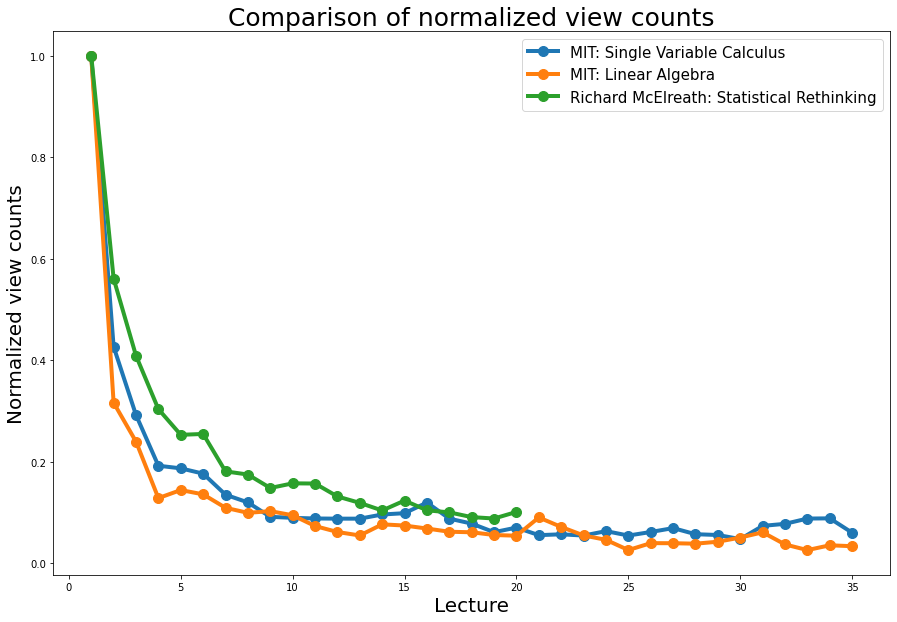

In [302]:
fig, ax = plt.subplots(figsize=(15,10))
for lecture, counts in views.items():
    counts = counts.copy() / counts.max()
    ax.plot(
        np.arange(counts.size) + 1,
        counts, 
        '.-', 
        linewidth = 4,
        markersize = 20,
        label = lecture
    )
ax.set_title('Comparison of normalized view counts', size=25)
ax.legend(fontsize=15)
ax.set_xlabel('Lecture', size = 20)
ax.set_ylabel('Normalized view counts', size = 20)
plt.savefig('normalized_counts.png')